In [1]:
# Imports

import pandas as pd
import seaborn as sns
import seaborn.objects as so

In [2]:
# Reading the csv file

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])

In [3]:
# Displaying a sample of 100 rows

dataFrm.sample(100)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15741,15741,31MZVljIC0y0wUpgafrw8Z,Yusei,Beyond Your Imagination,Romance in Tokyo,13,269624,False,0.521,0.298,...,-10.272,1,0.1590,0.974000,0.909000,0.2340,0.487,105.178,1,chill
94937,94937,5JoagKn5ANNAN33FjWY0GI,Kam Michael;Eredaze,Alive Again (ft. Eredaze),Alive Again - ft. Eredaze,41,187187,True,0.678,0.727,...,-6.534,0,0.0646,0.232000,0.000067,0.1070,0.453,143.003,4,sad
29501,29501,71kkmlYkfgbrFNozWnquQi,Dabin;Lowell,Holding On,Holding On,43,217347,False,0.465,0.690,...,-5.171,1,0.0394,0.051500,0.000009,0.1120,0.284,145.013,4,dubstep
37459,37459,5BVEbUAtYZAPciUbO5qDsQ,MC V7;MC Gui Gomes,Desisto Nunca,Desisto Nunca,47,192000,False,0.558,0.642,...,-6.393,1,0.0860,0.753000,0.000033,0.0754,0.170,180.217,4,funk
22676,22676,3m0il69qM3aZVsglCIJJOf,Dark Lunacy,Devoid,Stalingrad,22,431098,False,0.199,0.964,...,-4.667,1,0.2100,0.000754,0.006460,0.0575,0.155,76.065,4,death-metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595,14595,2AMXN7aIur89kqh8q8xR9N,Tatiana,Fiesta De Navidad Con Tatiana,Jingle Bells,32,180346,False,0.751,0.870,...,-4.757,1,0.0285,0.250000,0.000000,0.0902,0.783,104.493,4,children
81887,81887,1LATi1QmWT9eUWmrLi1Onk,Lana Del Rey,West Coast,Blue Banisters,0,293692,False,0.373,0.114,...,-13.171,1,0.0410,0.937000,0.000047,0.1040,0.172,90.945,1,pop
75513,75513,2BXdDjt3w3lzKUZnsbg8Qs,David Lanz,Return To The Heart,Return To The Heart,48,200826,False,0.467,0.090,...,-20.992,1,0.0652,0.974000,0.916000,0.0573,0.138,92.284,4,new-age
100725,100725,5oxZ8dVWzEAGagfzn54EL4,Guachupé,El Club del Amigo,Tafalla,34,219040,False,0.491,0.746,...,-3.455,1,0.0352,0.320000,0.000000,0.1300,0.670,183.852,4,ska


<Axes: >

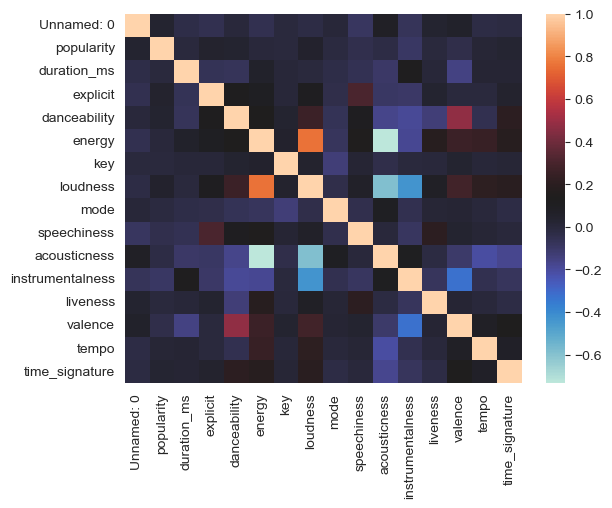

In [4]:
sns.heatmap(dataFrm.corr(numeric_only=True), cmap='icefire')

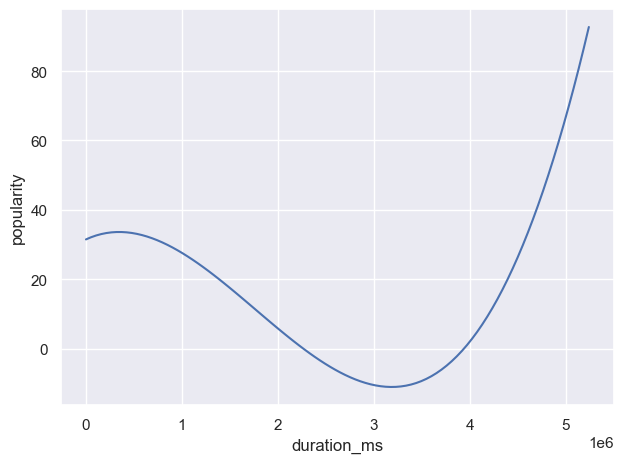

In [29]:
(
    so.Plot(dataFrm, x='duration_ms', y='popularity')
    .add(so.Line(), so.PolyFit(order=3))
    #.add(so.Dots()) # Alle Punkte
    .show()
)

# Erklärung:
# Dieses Plot zeigt, dass längere Tracks tendenziell beliebter sind.

# Basierend auf den Daten könnte das möglich sein, aber es ist nicht zwingend so.
# Laut den Daten, die vorhanden sind, werden kürzere Tracks mehr gehört. Aber da die wenigen Tracks die länger sind und gehört werden ein gutes Rating haben, ist es möglich, dass längere Tracks beliebter sind.


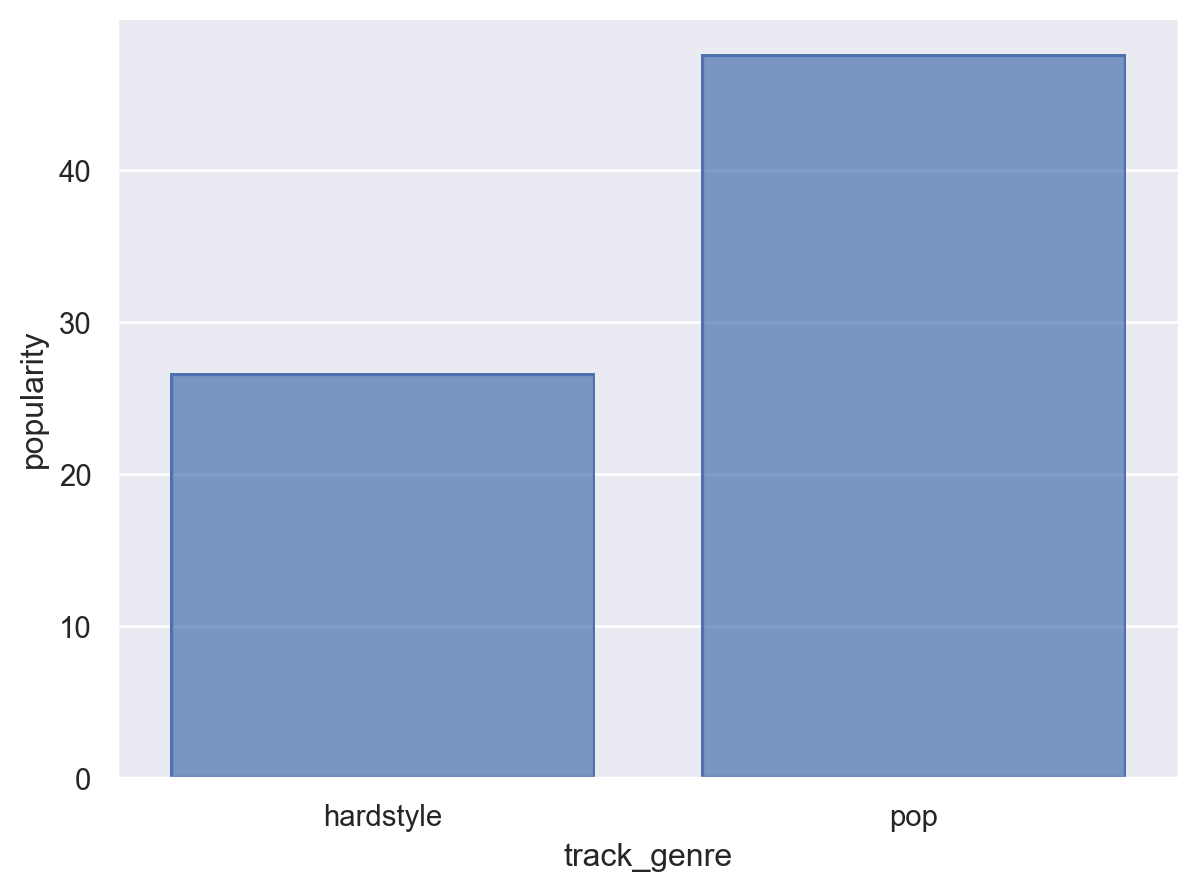

In [43]:
filtered_genres = dataFrm[dataFrm['track_genre'].isin(['pop', 'hardstyle'])]

(
    so.Plot(filtered_genres, x="track_genre", y="popularity")
    .add(so.Bar(), so.Agg())
)

# Erklärung:
# Dieses Plot zeigt, dass Pop-Tracks tendenziell beliebter sind als Dance-Tracks.

In [32]:
dataFrm['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow